<a href="https://colab.research.google.com/github/TatsianaPoto/m_test/blob/main/m_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import nltk
import string
from google.colab import files

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# Указываем путь к папке с файлами (измените путь, если файлы в подпапке после распаковки)
path_to_articles = 'articles'
all_files = [file for file in os.listdir(path_to_articles) if file.endswith('.txt')]

# Пустые списки для хранения содержания и размера файлов
contents = []
sizes = []

# Проходимся по каждому файлу в папке и собираем информацию
for file in all_files:
    file_path = os.path.join(path_to_articles, file)

    # Получаем размер файла
    size = os.path.getsize(file_path)
    sizes.append(size)

    # Читаем первые строки файла
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.readlines()[:5]
        contents.append(content)

# Сортировка по размеру и имени файла
sorted_indices = sorted(range(len(sizes)), key=lambda k: (-sizes[k], all_files[k]))

# Выводим информацию для первых 10 файлов
for i in sorted_indices[:10]:
    print(f"File: {all_files[i]}")
    print(f"Size: {sizes[i]} bytes")
    print("First lines:")
    for line in contents[i]:
        print(line.strip())
    print("----------------------------------------------------")


File: Text0918.txt
Size: 22416 bytes
First lines:
Taking the plunge
Tulane Stadium left mark on New Orleans
Tulane Stadium was the site of three Super Bowls before the Superdome showed up. In fact, it paved the way for the Superdome to exist. (Focus On Sport/Getty Images)
January 24, 2013
Focus on Sport/Getty Images
----------------------------------------------------
File: Text0326.txt
Size: 20805 bytes
First lines:
﻿I love the actual football games, of course, but I’d be lying if I didn’t admit to loving the anticipation, the buildup and ultimate culmination of the NFL Draft just as much.

Now that the regular season is over, here's what NFL fans have to look forward to.

I’m a sick pup, but I know I’m not alone.
----------------------------------------------------
File: Text0712.txt
Size: 20261 bytes
First lines:
Alex Marvez is a Senior NFL Writer for FOXSports.com. He has covered the NFL for the past 18 seasons as a beat writer and is the former president of the Pro Football Writer

In [6]:
# Устанавливаем необходимые ресурсы для NLTK
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Путь к папке с файлами
path_to_articles = './articles'
all_files = [file for file in os.listdir(path_to_articles) if file.endswith('.txt')]

# Получаем список стоп-слов
stop_words = set(stopwords.words('english'))

# Функция для обработки текста
def process_text(text):
    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление знаков пунктуации
    text = ''.join([char for char in text if char not in string.punctuation])

    # Токенизация
    tokens = word_tokenize(text)

    # Удаление стоп-слов
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Обработка всех файлов и сохранение их обратно
for file in all_files:
    file_path = os.path.join(path_to_articles, file)

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()

    processed_content = process_text(content)

    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(processed_content)

print("All files have been processed!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


All files have been processed!


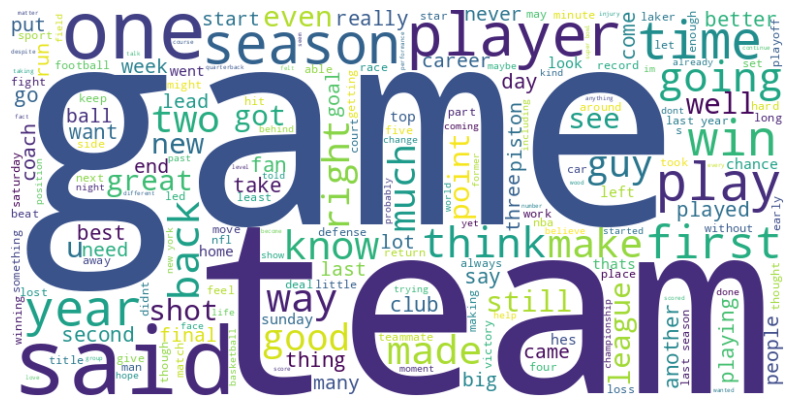

In [7]:
# Соберем все тексты из файлов
all_texts = ''

for file in all_files:
    file_path = os.path.join(path_to_articles, file)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        all_texts += f.read()

# Создаем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_texts)

# Отображаем облако слов
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

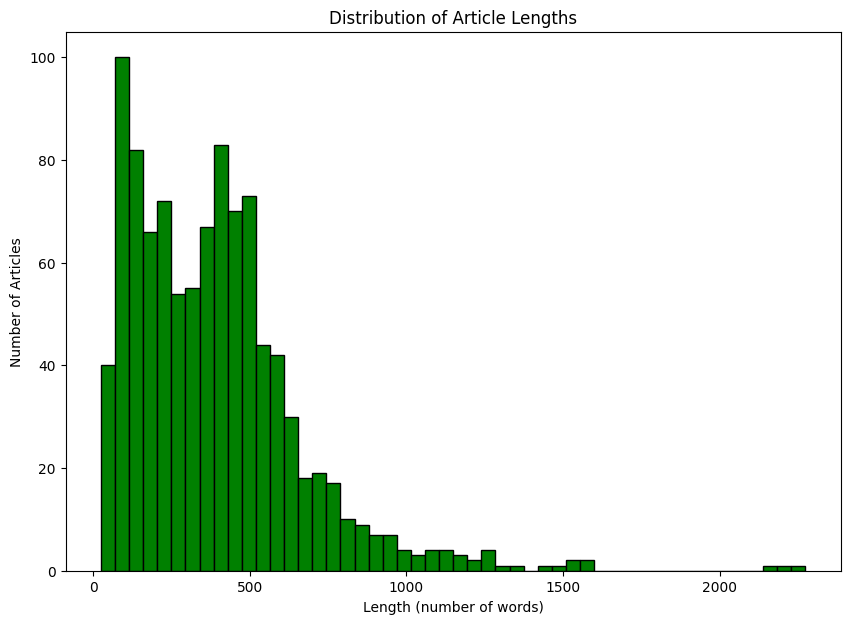

In [9]:
# Соберем длины всех статей
article_lengths = []

for file in all_files:
    file_path = os.path.join(path_to_articles, file)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        article_lengths.append(len(f.read().split()))

# Создаем гистограмму длин статей
plt.figure(figsize=(10, 7))
plt.hist(article_lengths, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (number of words)')
plt.ylabel('Number of Articles')
plt.show()

Мы можем определить набор ключевых слов для каждой из трех категорий (положительные, нейтральные, отрицательные). Если статья содержит какое-либо из этих слов, мы можем автоматически присвоить ей соответствующую категорию.

In [ ]:
# Определите ключевые слова для каждой категории
positive_keywords = ["best", "victory", "success", "impressive", "win", "champion", "triumph", "leading", "outstanding", "dominant"]
negative_keywords = ["defeat", "loss", "injury", "problem", "setback", "struggle", "underperform", "lag", "downturn", "criticism"]
neutral_keywords = ["match", "game", "training", "player", "team", "field", "score", "season", "tournament", "competition"]

# Выберите 100 статей
selected_files = all_files

# Функция для авторазметки статьи
def auto_label(text):
    for word in positive_keywords:
        if word in text:
            return "positive"
    for word in negative_keywords:
        if word in text:
            return "negative"
    for word in neutral_keywords:
        if word in text:
            return "neutral"
    return "unknown"

labels = []

for file in selected_files:
    file_path = os.path.join(path_to_articles, file)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        label = auto_label(text)
        labels.append(label)

# Проверка результатов разметки
for i, label in enumerate(labels):
    print(f"Article {i + 1}: {label}")

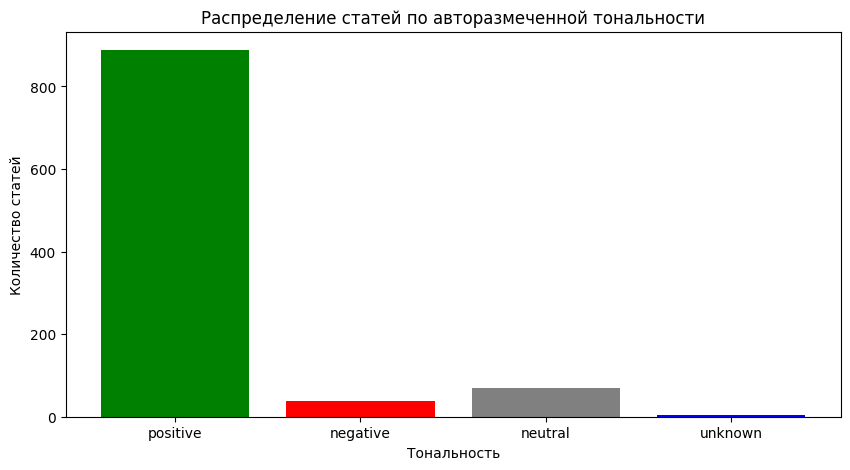

In [14]:
# Подсчет статей для каждой категории
label_counts = dict.fromkeys(['positive', 'negative', 'neutral', 'unknown'], 0)
for label in labels:
    label_counts[label] += 1

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values(), color=['green', 'red', 'gray', 'blue'])
plt.title('Распределение статей по авторазмеченной тональности')
plt.xlabel('Тональность')
plt.ylabel('Количество статей')
plt.show()

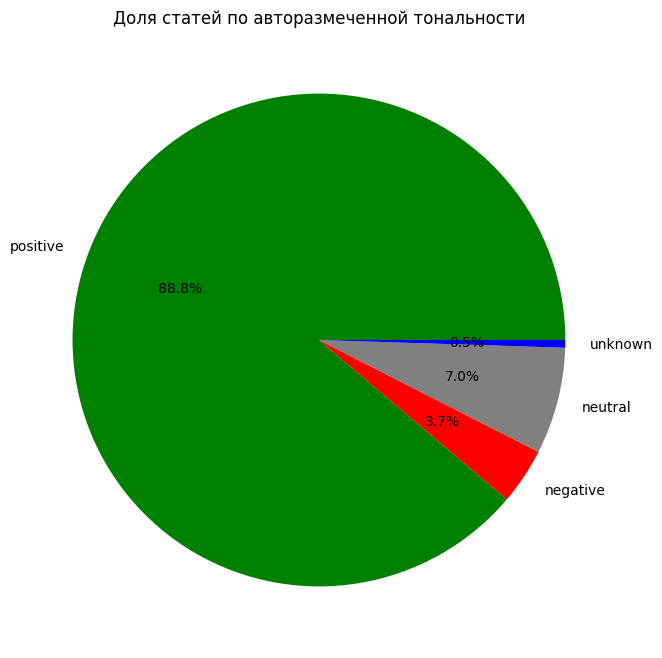

In [15]:
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'gray', 'blue'])
plt.title('Доля статей по авторазмеченной тональности')
plt.show()

Очевидно, что такоей подход плохо справляется с авторазметкой

Авторазметка тональности часто использует ряд методов и подходов. Вот несколько популярных методов, которые можно рассмотреть:

**Словарные методы:**

**SentiWordNetс**: Это лексическая база данных для анализа тональности, в которой каждому слову присваивается оценка позитивности, нейтральности и негативности.

**VADER (Valence Aware Dictionary and sEntiment Reasoner)**: Это инструмент для анализа тональности, основанный на словаре и включающий правила для обработки таких вещей, как модификаторы интенсивности, знаки препинания и комбинации слов.

**Методы на основе машинного обучения:**

**Модели на основе мешка слов (Bag of Words):** При этом методе тексты преобразуются в векторы, где каждое слово представлено в виде отдельного признака, и на основе этих векторов обучают модель.

**TF-IDF (Term Frequency-Inverse Document Frequency):** Этот метод взвешивает слова на основе того, насколько часто они встречаются в документе по сравнению с их частотой во всех документах.

**Word Embeddings:** Векторные представления слов, такие как Word2Vec или GloVe, которые улавливают семантическое значение слов.

**Модели глубокого обучения:** RNN (Рекуррентные нейронные сети), LSTM (Долгосрочная память с коротким сроком хранения) или Transformers (например, BERT) для обработки последовательности текста.

**Перенос обучения (Transfer Learning):** Использование предварительно обученных моделей, таких как BERT или RoBERTa, для анализа тональности.

Вы можете дообучить такую модель на своих данных или использовать её "из коробки".

**Rule-based системы:**

Некоторые системы, вроде **TextBlob**, используют набор правил для определения тональности текста на основе его структуры и словаря.
Гибридные системы:

Комбинирование методов, например, применение **rule-based** системы для предварительной обработки и последующее применение модели машинного обучения для окончательного анализа.

При выборе метода важно учитывать размер и природу вашего набора данных, а также ресурсы и время, доступные для проекта.

Реализцем метод **SentiWordNetс**

In [16]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [18]:
import os
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

# Загрузка ресурсов NLTK
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Функции, определенные ранее:
def get_sentiment_sentiwordnet(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)

    total_pos_score = 0
    total_neg_score = 0

    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)

        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue

        lemma = nltk.WordNetLemmatizer().lemmatize(word, pos=wn_tag)

        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Берем первый synset
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        total_pos_score += swn_synset.pos_score()
        total_neg_score += swn_synset.neg_score()

    # Определение итоговой тональности
    if total_pos_score > total_neg_score:
        return "positive"
    elif total_neg_score > total_pos_score:
        return "negative"
    else:
        return "neutral"

def get_wordnet_pos(treebank_tag):
    """Возвращает POS тэг для первого символа treebank тэга."""
    return {
        'J': wn.ADJ,
        'V': wn.VERB,
        'N': wn.NOUN,
        'R': wn.ADV,
    }.get(treebank_tag[0], wn.NOUN)

# Функция для обработки всех файлов в директории и сохранения результатов в CSV
def process_directory(directory_path, output_csv):
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    sentiments = []

    for file in files:
        file_path = os.path.join(directory_path, file)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
            sentiment = get_sentiment_sentiwordnet(text)
            sentiments.append({'filename': file, 'sentiment': sentiment})

    df = pd.DataFrame(sentiments)
    df.to_csv(output_csv, index=False)

# Применение функции к вашей директории
process_directory('articles', 'sentiments.csv')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


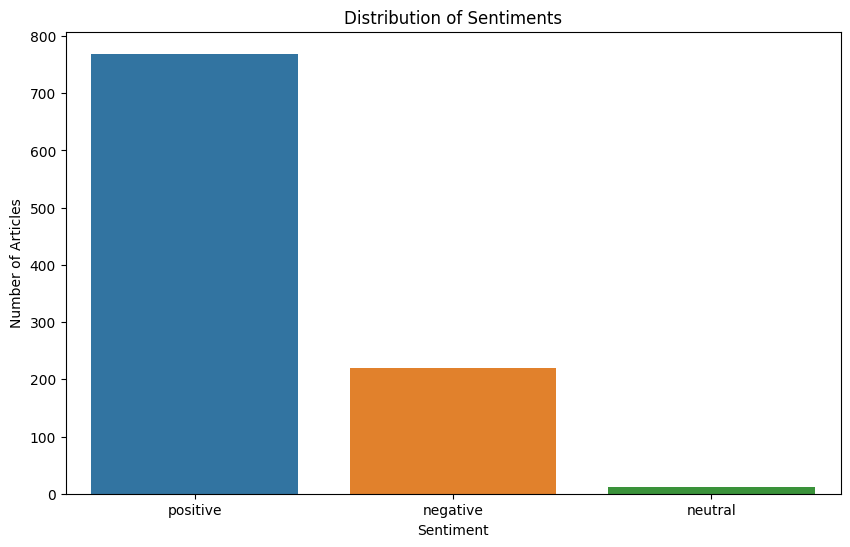

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV
df = pd.read_csv('sentiments.csv')

# Визуализация распределения тональности
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

Уже лучше

Реализуем метод **VADER (Valence Aware Dictionary and sEntiment Reasoner)**



In [20]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Положительное значение compound указывает на положительный настрой.

Отрицательное значение compound указывает на отрицательный настрой.

Близкое к нулю значение compound может указывать на нейтральность или смешанные чувства.

Включение pos, neu, и neg дает вам долю текста, которая положительная, нейтральная или отрицательная, соответственно.

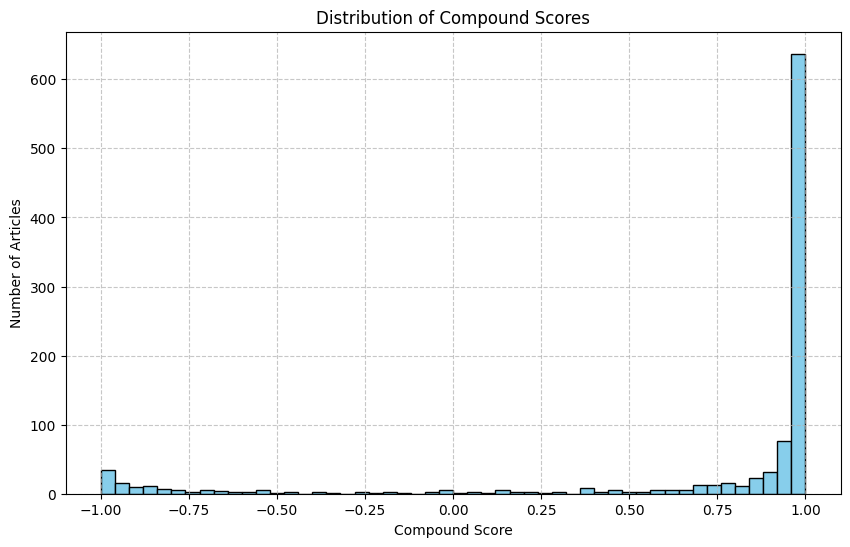

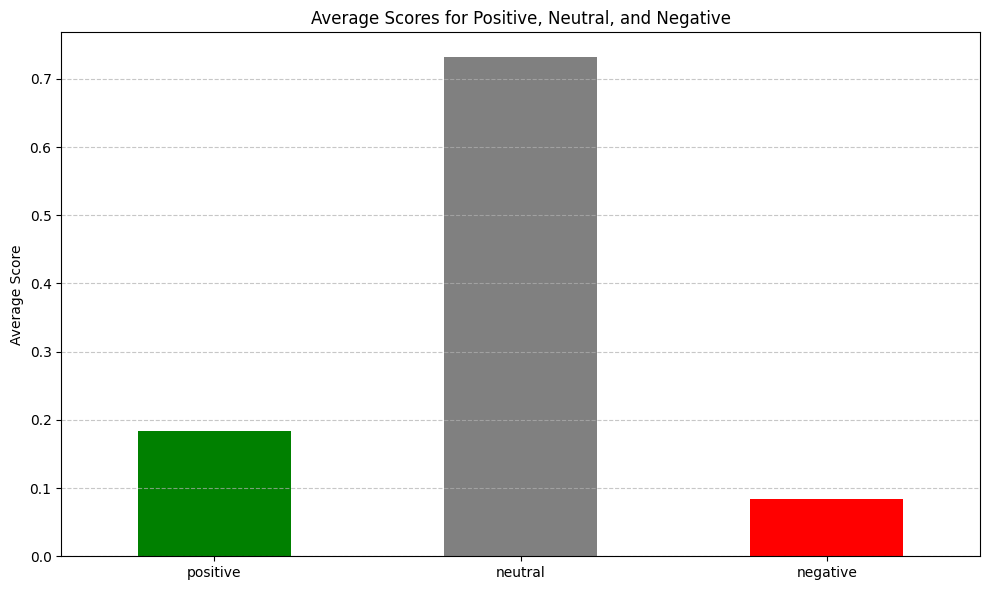

In [27]:
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Инициализация VADER
sid = SentimentIntensityAnalyzer()

# Определение директории и чтение файлов
path_to_articles = "articles"
all_files = os.listdir(path_to_articles)

sentiments = []

# Проходим по всем файлам и анализируем тональность
for file in all_files:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        sentiment = sid.polarity_scores(text)
        sentiments.append({
            'file_name': file,
            'compound': sentiment['compound'],
            'positive': sentiment['pos'],
            'neutral': sentiment['neu'],
            'negative': sentiment['neg']
        })

# Создание DataFrame
df = pd.DataFrame(sentiments)

# Сохранение в CSV
df.to_csv('vader_sentiments.csv', index=False)

# Гистограмма для compound
plt.figure(figsize=(10, 6))
plt.hist(df['compound'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Number of Articles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Средние значения для positive, neutral и negative
mean_scores = df[['positive', 'neutral', 'negative']].mean()

# Столбчатая диаграмма
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Average Scores for Positive, Neutral, and Negative')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Очевидно, что vader определяет большую долю статей как нейтральную

Попробуем другой подход, используем **Методы на основе машинного обучения:**

Для реализации модели на основе мешка слов (Bag of Words) с учетом разметки из файла sentiments.csv, выполним следующие шаги:

Прочитаем файл sentiments.csv и используем эту информацию для создания списка текстов и их меток.

Преобразуем тексты в векторы с использованием модели мешка слов.

Разделите набор данных на обучающий и тестовый.

Обучим классификатор на основе векторов текстов.

Оцените производительность модели.





In [28]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Чтение разметки из файла sentiments.csv
sentiments_df = pd.read_csv('sentiments.csv')
filenames = sentiments_df['filename'].tolist()
labels = sentiments_df['sentiment'].tolist()

# Путь к вашим данным
path_to_articles = "articles"
texts = []

# Чтение и предварительная обработка данных
for file in filenames:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        texts.append(text)

# Создание мешка слов
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Обучение модели
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка производительности
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.40      0.45      0.42        38
     neutral       0.00      0.00      0.00         6
    positive       0.84      0.85      0.84       156

    accuracy                           0.74       200
   macro avg       0.41      0.43      0.42       200
weighted avg       0.73      0.74      0.74       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Поробуем сделать тоже самое для разметки с большим количеством нейтральных отзывав, это файл разметкой vader_sentiments.csv



In [29]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Чтение разметки из файла vader_sentiments.csv
sentiments_df = pd.read_csv('vader_sentiments.csv')

# Преобразование compound в метку
def get_label(compound):
    if compound > 0.05:
        return 'positive'
    elif compound < -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiments_df['label'] = sentiments_df['compound'].apply(get_label)
filenames = sentiments_df['file_name'].tolist()
labels = sentiments_df['label'].tolist()

# Путь к вашим данным
path_to_articles = "articles"
texts = []

# Чтение и предварительная обработка данных
for file in filenames:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        texts.append(text)

# Создание мешка слов
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Обучение модели
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка производительности
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.53      0.53      0.53        19
     neutral       0.00      0.00      0.00         1
    positive       0.94      0.95      0.95       180

    accuracy                           0.91       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.90      0.91      0.90       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видно, что результаты все еще низкие

Давайте применим TF-IDF к вашим данным

In [31]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Чтение разметки из файла sentiments.csv
sentiments_df = pd.read_csv('sentiments.csv')

filenames = sentiments_df['filename'].tolist()
labels = sentiments_df['sentiment'].tolist()

# Путь к вашим данным
path_to_articles = "articles"
texts = []

# Чтение и предварительная обработка данных
for file in filenames:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        texts.append(text)

# Создание TF-IDF векторов
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Обучение модели
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка производительности
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.05      0.10        38
     neutral       0.00      0.00      0.00         6
    positive       0.79      0.99      0.88       156

    accuracy                           0.79       200
   macro avg       0.48      0.35      0.33       200
weighted avg       0.74      0.79      0.70       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Очевидно, что позитивный класс предсказывается много лучше, негативный - хуже, нейтральный совсем не предсказывается

Попробуем использовать **Word Embeddings:** Векторные представления слов, такие как **Word2Vec**

In [32]:
import os
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Чтение разметки из файла sentiments.csv
sentiments_df = pd.read_csv('sentiments.csv')

filenames = sentiments_df['filename'].tolist()
labels = sentiments_df['sentiment'].tolist()

# Путь к вашим данным
path_to_articles = "articles"
texts = []

# Чтение и предварительная обработка данных
for file in filenames:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read().lower().split()
        texts.append(text)

# Обучение Word2Vec модели
model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)
model.train(texts, total_examples=len(texts), epochs=10)

# Получение векторных представлений документов
def get_doc_vector(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([get_doc_vector(text, model) for text in texts])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Обучение классификатора
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка производительности
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.43      0.24      0.31        38
     neutral       0.00      0.00      0.00         6
    positive       0.81      0.93      0.87       156

    accuracy                           0.77       200
   macro avg       0.41      0.39      0.39       200
weighted avg       0.71      0.77      0.73       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Вырасли метрики определения негативного класса, определение нейтрального класса остались без изменений. Метрика определения позитивного класса - вырасла

Мне кажется хорошей идеей воспользоваться подходом **GloVe**

Для этого необходимо скачать https://nlp.stanford.edu/projects/glove/ предобученные модели, они слишком объемные (более 850 Мб в архиве), ниже код для реализации идеи

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка данных
data_path = "vader_sentiments.csv"
data = pd.read_csv(data_path)

# Чтение статей из папки 'articles'
path_to_articles = 'articles'
all_files = [f for f in os.listdir(path_to_articles) if os.path.isfile(os.path.join(path_to_articles, f))]

texts = []
for file in all_files:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as opened_file:
        texts.append(opened_file.read())

# Создание DataFrame
df = pd.DataFrame({'filename': all_files, 'text': texts})

# Объединение с разметкой
merged_df = df.merge(data, left_on='filename', right_on='file_name')
texts = merged_df['text'].values
labels = merged_df['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative')).values

# Разделение на тренировочную и тестовую выборки
texts_train, texts_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF векторизация
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(texts_train)
X_test = tfidf_vectorizer.transform(texts_test)

# Обучение и тестирование классификатора
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Word Embeddings с использованием GloVe
glove_input_file = 'glove.6B.100d.txt'  # Убедитесь, что путь к файлу правильный!
word2vec_output_file = glove_input_file
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False, no_header=True)

# Конвертация текстов в средние векторы GloVe
def text_to_avg_vector(text, model):
    words = text.split()
    vecs = [model[word] for word in words if word in model]
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    vecs = np.array(vecs)
    return vecs.mean(axis=0)

X_train_glove = np.array([text_to_avg_vector(text, glove_model) for text in texts_train])
X_test_glove = np.array([text_to_avg_vector(text, glove_model) for text in texts_test])

# Обучение и тестирование классификатора на GloVe векторах
clf_glove = LogisticRegression(max_iter=1000)
clf_glove.fit(X_train_glove, y_train)
y_pred_glove = clf_glove.predict(X_test_glove)
print(classification_report(y_test, y_pred_glove))

Реализуем более тяжелые подходы, нейросети)

Epoch 1/10
25/25 [==============================] - 19s 479ms/step - loss: 0.9387 - accuracy: 0.7400 - val_loss: 0.6573 - val_accuracy: 0.7800
Epoch 2/10
25/25 [==============================] - 11s 428ms/step - loss: 0.6955 - accuracy: 0.7538 - val_loss: 0.6170 - val_accuracy: 0.7800
Epoch 3/10
25/25 [==============================] - 17s 667ms/step - loss: 0.6310 - accuracy: 0.7588 - val_loss: 0.6233 - val_accuracy: 0.7800
Epoch 4/10
25/25 [==============================] - 11s 428ms/step - loss: 0.6284 - accuracy: 0.7538 - val_loss: 0.6275 - val_accuracy: 0.7800
Epoch 5/10
25/25 [==============================] - 9s 360ms/step - loss: 0.6187 - accuracy: 0.7625 - val_loss: 0.6248 - val_accuracy: 0.7800
Epoch 6/10
25/25 [==============================] - 11s 442ms/step - loss: 0.6249 - accuracy: 0.7650 - val_loss: 0.6324 - val_accuracy: 0.7800
Epoch 7/10
25/25 [==============================] - 10s 420ms/step - loss: 0.6137 - accuracy: 0.7675 - val_loss: 0.6366 - val_accuracy: 0.7800


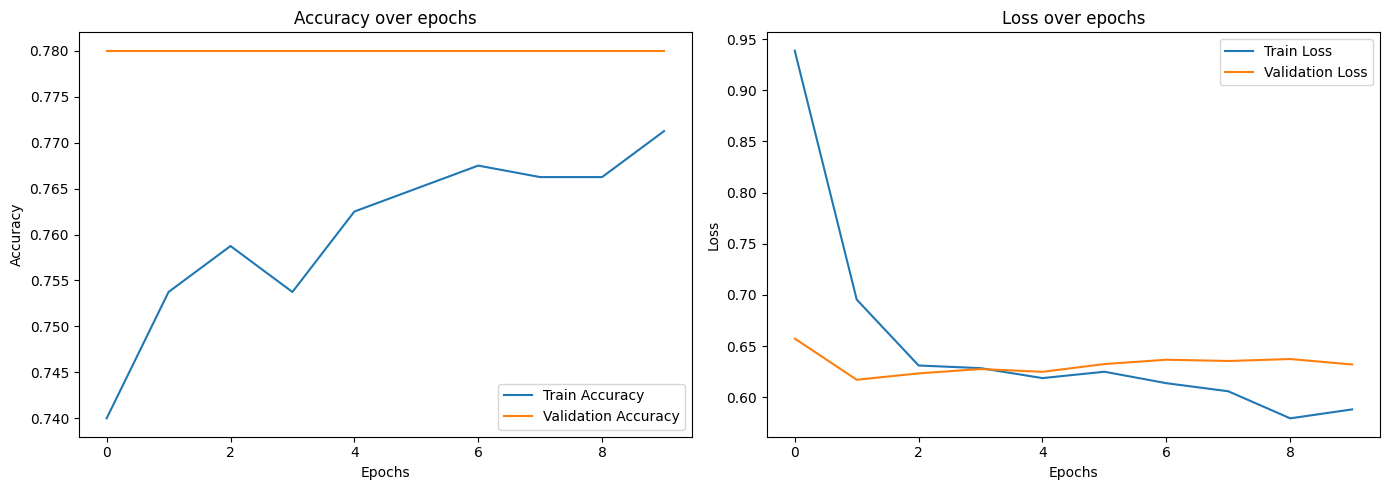

7/7 [==============================] - 2s 109ms/step
              precision    recall  f1-score   support

    positive       0.78      1.00      0.88       156
     neutral       0.00      0.00      0.00         6
    negative       0.00      0.00      0.00        38

    accuracy                           0.78       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.61      0.78      0.68       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Загрузка данных
data_path = "sentiments.csv"
data = pd.read_csv(data_path)

# Чтение статей из папки 'articles'
path_to_articles = 'articles'
all_files = [f for f in os.listdir(path_to_articles) if os.path.isfile(os.path.join(path_to_articles, f))]

texts = []
for file in all_files:
    with open(os.path.join(path_to_articles, file), 'r', encoding='utf-8', errors='ignore') as opened_file:
        texts.append(opened_file.read())

# Создание DataFrame
df = pd.DataFrame({'filename': all_files, 'text': texts})

# Объединение с разметкой
merged_df = df.merge(data, on='filename')
texts = merged_df['text'].values
labels = merged_df['sentiment'].values

# Подготовка данных для RNN
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, padding='post', maxlen=500)

# Подготовка меток
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
labels = np.array([label_mapping[label] for label in labels])

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# Построение модели
model = Sequential([
    Embedding(10000, 16, input_length=500),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Визуализация метрик
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на тестовой выборке
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Вывод метрик качества
report = classification_report(y_test, y_pred, target_names=['positive', 'neutral', 'negative'])
print(report)

Выход из этой ситуации скорректировать веса и решить задачу дисбаланна классов: SMOTE, андер или овер семплирование